<a href="https://colab.research.google.com/github/myhoangmy12/myRepo-1/blob/master/Diamonds_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline

In [4]:
# load the dataset into a pandas dataframe

from google.colab import drive
diamonds=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diamonds.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# descriptive statistics for numeric variables
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


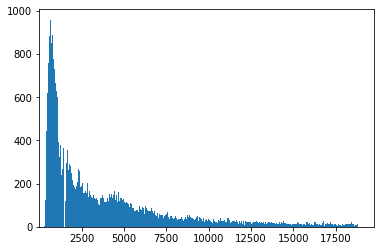

In [7]:
# plot of diamond prices
bin_edges = np.arange(0, diamonds['price'].max()+30, 30)
plt.hist(data = diamonds, x = 'price', bins = bin_edges)
plt.xlim((0.6));

(0.0, 3.0)

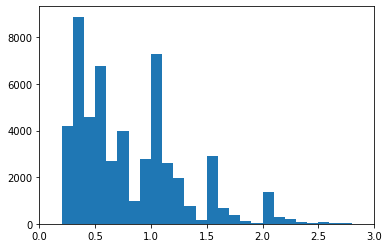

In [8]:
# plot of carat weights
bin_edges = np.arange(0, diamonds['carat'].max()+0.1, 0.1)
plt.hist(data = diamonds, x = 'carat', bins = bin_edges);
plt.xlim(0,3);

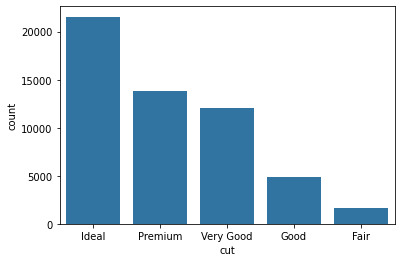

In [12]:
# plots of cut, color, and clarity grades
base_color = sns.color_palette()[0]
cat_order = diamonds['cut'].value_counts().index
sns.countplot(data = diamonds, x = 'cut', color = base_color, order = cat_order);

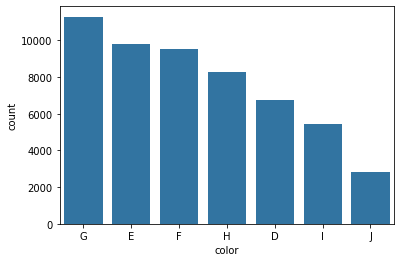

In [16]:
base_color = sns.color_palette()[0]
cat_order = diamonds['color'].value_counts().index
sns.countplot(data = diamonds, x = 'color', color = base_color, order = cat_order);

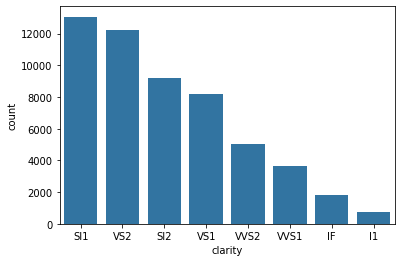

In [15]:
base_color = sns.color_palette()[0]
cat_order = diamonds['clarity'].value_counts().index
sns.countplot(data = diamonds, x = 'clarity', color = base_color, order = cat_order);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


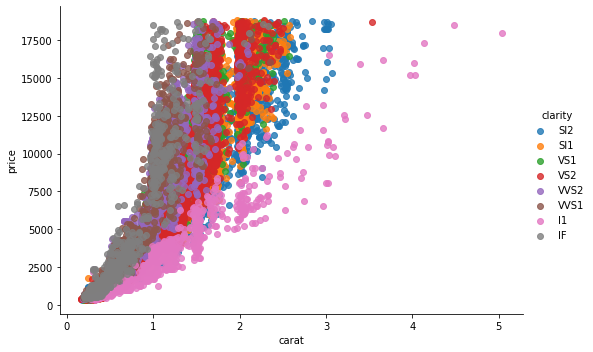

In [18]:
# multivariate plot of price by carat weight, and clarity
g = sns.FacetGrid( data = diamonds, hue = 'clarity',size = 5, aspect=1.5 )
g = g.map(sns.regplot, 'carat' ,'price', x_jitter = 0.04 , fit_reg = False);
g.add_legend()
plt.xlabel('carat')
plt.ylabel('price');

**Price by Carat and Clarity** 

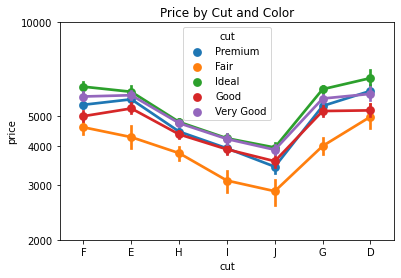

In [22]:
import seaborn as sb
diamonds_sub = diamonds.loc[ (diamonds['carat']>= 0.99) & (diamonds['carat']<=1.03) , : ]

# cut and color vs price ( two categorical vs one numerical )
def log_trans(y, inverse = False):
    if not inverse:     
        return np.log10(y)     
    else:
        return np.power(10, y)
    
diamonds['price_log'] = diamonds['price'].apply(log_trans)

sb.pointplot(data = diamonds_sub, x = 'color', y = diamonds['price_log'], hue = 'cut')
# cut has less types so choose it as hue

plt.title('Price by Cut and Color')
plt.xlabel('cut')
plt.ylabel('price');

# both plt.xlabel() and plt.ylabel() , first parameter is values , second parameter is labels
y_tick_locs = [2000,3000, 4000, 5000, 10000]    # the tick_locs should be set according to real values 
plt.yticks(log_trans(y_tick_locs), y_tick_locs);

**Price by Cut and Color** 